# Программирование на Python, БИ

## НИУ ВШЭ, 2025-26 учебный год

## Групповой проект №2. DE: Scraping & API

## Общая информация



**Члены команды:**

Сергеева Елизавета Андреевна, ББИ2406

Калинина Дарья Александровна, ББИ2406

Судницына Анастасия Андреевна, ББИ2406

## Описание задания

В современном мире данных эффективный сбор и интеграция информации из различных источников являются фундаментом для принятия обоснованных решений и успешного ведения бизнеса. Компании, стремясь к конкурентоспособности, активно используют технологии веб-скрапинга и взаимодействия с API для автоматизации процесса сбора данных, обеспечения их актуальности и полноты.

В данном проекте мы на реальных данных попрактиковались в том, как осуществляется веб-скрапинг различных сайтов для извлечения необходимой информации, а также в работе с API популярных сервисов для получения структурированных данных. Мы научились применять современные инструменты и библиотеки, отражающие различные этапы DE, обрабатывать и очищать полученную информацию, а также интегрировать данные из различных источников для последующего использования их в аналитических и бизнес-задачах.



## Этапы проекта

- Выбор источников данных
- Формулировка бизнес-задачи, которую могла бы хотеть решить компания/платформа, на основе собираемых данных
- Обоснование сформулированной бизнес-задачи
- Извлечение данных путём работы с API
- Извлечение данных путём скрапинга и парсинга
- Первичная обработка данных (EDA)
- Предложения гипотез
- Получение и агрегация результатов, финальные выводы

## Бизнес-задача и ее обоснование

Провести комплексный анализ музыкальной индустрии для оптимизации процессов создания и продвижения музыкальных треков с целью максимизации их коммерческого потенциала. То есть анализ различных характеристик музыкальных треков и их исполнителей на основе данных, взятых с крупных музыкальных платформ и затем анализ их зависимостей. Наша цель в том, чтобы выяснить какие метрики могут повлиять на успех трека и ожидаемый бизнес-результат - это снижение рисков при создании и продвижении музыкального контента за счет data-driven подхода к принятию решений.

#EDA

##очистка и подготовка данных

###данные

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
spotify = pd.read_csv('spotify.csv', header='infer', sep=',')
spotify.columns = spotify.columns.str.lower().str.replace(' ', '_')

apple = pd.read_csv('apple.csv', header='infer', sep=',')
apple.columns = apple.columns.str.lower().str.replace(' ', '_')

genius = pd.read_csv('genius.csv', header='infer', sep=',')
genius.columns = genius.columns.str.lower().str.replace(' ', '_')

musbrain = pd.read_csv('musicbrainz.csv', header='infer', sep=',')
musbrain.columns = musbrain.columns.str.lower().str.replace(' ', '_')

In [ ]:
spotify

,сервис,исполнитель,количество_подписчиков,популярность_исполнителя,жанры,название_альбома,тип_альбома,год_выпуска,количество_треков,название_трека,...,solo_tracks,solo_streams,as_lead_tracks,as_lead_streams,total_tracks,total_streams,общие_прослушивания_артиста,прослушивания_(ежедневные),прослушивания_(общие),spotify_url_(трек)
0,Spotify,Bruno Mars,75492598,90,NaN,Unorthodox Jukebox,album,2012,10,Young Girls,...,47.0,2.790452e+10,81.0,3.429509e+10,110.0,4.801280e+10,NaN,88426,268689877,https://open.spotify.com/track/3G5iN5QBqMeXx3u...
1,Spotify,Bruno Mars,75492598,90,NaN,Unorthodox Jukebox,album,2012,10,Locked out of Heaven,...,47.0,2.790452e+10,81.0,3.429509e+10,110.0,4.801280e+10,NaN,1867386,2877914283,https://open.spotify.com/track/3w3y8KPTfNeOKPi...
2,Spotify,Bruno Mars,75492598,90,NaN,Unorthodox Jukebox,album,2012,10,Gorilla,...,47.0,2.790452e+10,81.0,3.429509e+10,110.0,4.801280e+10,NaN,77849,266502017,https://open.spotify.com/track/2ih2U8ttFzCjnQ5...
3,Spotify,Bruno Mars,75492598,90,NaN,Unorthodox Jukebox,album,2012,10,Treasure,...,47.0,2.790452e+10,81.0,3.429509e+10,110.0,4.801280e+10,NaN,533043,1273186958,https://open.spotify.com/track/55h7vJchibLdUkx...
4,Spotify,Bruno Mars,75492598,90,NaN,Unorthodox Jukebox,album,2012,10,Moonshine,...,47.0,2.790452e+10,81.0,3.429509e+10,110.0,4.801280e+10,NaN,29849,88852060,https://open.spotify.com/track/30raivfq7rSt5nK...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74240,Spotify,Shankar-Ehsaan-Loy,8158845,72,"bollywood, sufi, desi, hindi pop",Soorma (Original Motion Picture Soundtrack [De...,album,2018,8,Pardesiya,...,9.0,1.916315e+07,146.0,2.570289e+09,185.0,2.736472e+09,25152036.0,198,1337808,https://open.spotify.com/track/32jSoE0HDwp2C7B...
74241,Spotify,Shankar-Ehsaan-Loy,8158845,72,"bollywood, sufi, desi, hindi pop",Soorma (Original Motion Picture Soundtrack [De...,album,2018,8,Flicker Singh,...,9.0,1.916315e+07,146.0,2.570289e+09,185.0,2.736472e+09,25152036.0,146,511013,https://open.spotify.com/track/67AL80V5PvjvDcQ...
74242,Spotify,Shankar-Ehsaan-Loy,8158845,72,"bollywood, sufi, desi, hindi pop",Soorma (Original Motion Picture Soundtrack [De...,album,2018,8,Ishq Di Baajiyaan - Lofi Flip,...,9.0,1.916315e+07,146.0,2.570289e+09,185.0,2.736472e+09,25152036.0,1576,2493841,https://open.spotify.com/track/73N2ZAiLbJ6KEDw...
74243,Spotify,Shankar-Ehsaan-Loy,8158845,72,"bollywood, sufi, desi, hindi pop",Soorma (Original Motion Picture Soundtrack [De...,album,2018,8,"Ishq Di Baajiyaan - Reprise (From ""Soorma"")",...,9.0,1.916315e+07,146.0,2.570289e+09,185.0,2.736472e+09,25152036.0,858,2579724,https://open.spotify.com/track/1E4XTFx9XXtefUB...


In [ ]:
apple

,track_id,title,artist,album,duration_ms,genre,release_date,explicit,track_number,url,...,release_year,is_single,has_feat_in_title,title_length,title_word_count,is_live,is_remix,is_acoustic,is_cover,content_type
0,1725240530,redrum,21 Savage,american dream,270698,Hip-Hop/Rap,2024-01-12,False,3,https://music.apple.com/us/album/redrum/172524...,...,2024,False,0,6,1,False,False,False,False,standard
1,1725240186,american dream,21 Savage,american dream,63800,Hip-Hop/Rap,2024-01-12,False,1,https://music.apple.com/us/album/american-drea...,...,2024,True,0,14,2,False,False,False,False,standard
2,1725240193,all of me,21 Savage,american dream,198293,Hip-Hop/Rap,2024-01-12,False,2,https://music.apple.com/us/album/all-of-me/172...,...,2024,False,0,9,3,False,False,False,False,standard
3,1725240537,sneaky,21 Savage,american dream,201672,Hip-Hop/Rap,2024-01-12,False,5,https://music.apple.com/us/album/sneaky/172524...,...,2024,False,0,6,1,False,False,False,False,standard
4,1725240548,letter to my brudda,21 Savage,american dream,159134,Hip-Hop/Rap,2024-01-12,False,7,https://music.apple.com/us/album/letter-to-my-...,...,2024,False,0,19,4,False,False,False,False,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17804,1642630592,fine,sombr,fine - Single,232174,Indie Rock,2022-01-21,False,1,https://music.apple.com/us/album/fine/16426305...,...,2022,True,0,4,1,False,False,False,False,single
17805,1704942277,silhouette,sombr,in another life,256520,Indie Rock,2022-08-29,False,6,https://music.apple.com/us/album/silhouette/17...,...,2022,False,0,10,1,False,False,False,False,standard
17806,1704942587,my house is warm,sombr,in another life,215587,Indie Rock,2022-08-29,False,7,https://music.apple.com/us/album/my-house-is-w...,...,2022,False,0,16,4,False,False,False,False,standard
17807,1704942271,why are we like this,sombr,in another life,154533,Indie Rock,2022-08-29,False,5,https://music.apple.com/us/album/why-are-we-li...,...,2022,False,0,20,5,False,False,False,False,standard


In [ ]:
genius

,title,artist,search_artist,featured_artists,release_date,release_year,album,url,views,genre,explicit
0,That’s What I Like,Bruno Mars,Bruno Mars,NaN,NaN,NaN,Single,https://genius.com/Bruno-mars-thats-what-i-lik...,3380829,Popular,False
1,When I Was Your Man,Bruno Mars,Bruno Mars,NaN,NaN,NaN,Single,https://genius.com/Bruno-mars-when-i-was-your-...,2900782,Popular,False
2,Finesse (Remix),Bruno Mars,Bruno Mars,Cardi B,NaN,NaN,Single,https://genius.com/Bruno-mars-finesse-remix-ly...,2790340,Popular,False
3,Versace on the Floor,Bruno Mars,Bruno Mars,NaN,NaN,NaN,Single,https://genius.com/Bruno-mars-versace-on-the-f...,2242181,Popular,False
4,24K Magic,Bruno Mars,Bruno Mars,NaN,NaN,NaN,Single,https://genius.com/Bruno-mars-24k-magic-lyrics,1830136,Popular,False
...,...,...,...,...,...,...,...,...,...,...,...
20665,100's,Tyga,Tyga,"A.E. (æ), Chief Keef",NaN,NaN,Single,https://genius.com/Tyga-100s-lyrics,41422,Popular,False
20666,Get Rich,Tyga,Tyga,NaN,NaN,NaN,Single,https://genius.com/Tyga-get-rich-lyrics,40992,Popular,False
20667,Bad Bitches,Tyga,Tyga,Gudda Gudda,NaN,NaN,Single,https://genius.com/Tyga-bad-bitches-lyrics,40485,Popular,False
20668,Baller Alert,Tyga,Tyga,"2 Chainz, Rick Ross",NaN,NaN,Single,https://genius.com/Tyga-baller-alert-lyrics,39585,Popular,False


In [ ]:
musbrain

,track_title,artist,artist_mbid,artist_type,artist_country,artist_start_year,artist_genres,artist_gender,has_features,is_remix,...,release_date,release_year,release_country,label,release_format,track_number,duration,duration_seconds,track_length_category,track_id
0,Marisola (Remix),Cris MJ,a89326cc-8fb3-4cdd-9fc6-69386e95cbd2,Person,NaN,NaN,NaN,Male,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,1
1,333,Cris MJ,a89326cc-8fb3-4cdd-9fc6-69386e95cbd2,Person,NaN,NaN,NaN,Male,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Cris MJ&Yan Block,NaN,unknown,2
2,Abriendo puertas,Cris MJ,a89326cc-8fb3-4cdd-9fc6-69386e95cbd2,Person,NaN,NaN,NaN,Male,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Cris MJ,NaN,unknown,3
3,Agradecido,Cris MJ,a89326cc-8fb3-4cdd-9fc6-69386e95cbd2,Person,NaN,NaN,NaN,Male,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Cris MJ,NaN,unknown,4
4,Daytona,Cris MJ,a89326cc-8fb3-4cdd-9fc6-69386e95cbd2,Person,NaN,NaN,NaN,Male,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Cris MJ,NaN,unknown,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36322,Danny Phantom (lyric video),XXXTENTACION,61af87f4-16ee-4431-8504-cc06187079fb,Person,NaN,NaN,NaN,Male,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Trippie Redd&XXXTENTACION,NaN,unknown,8315
36323,10,XXXTENTACION,61af87f4-16ee-4431-8504-cc06187079fb,Person,NaN,NaN,NaN,Male,0,0,...,NaN,NaN,NaN,NaN,CD,10.0,XXXTENTACION,NaN,unknown,8316
36324,11,XXXTENTACION,61af87f4-16ee-4431-8504-cc06187079fb,Person,NaN,NaN,NaN,Male,0,0,...,NaN,NaN,NaN,NaN,CD,11.0,XXXTENTACION,NaN,unknown,8317
36325,10,XXXTENTACION,61af87f4-16ee-4431-8504-cc06187079fb,Person,NaN,NaN,NaN,Male,0,0,...,NaN,NaN,NaN,NaN,Digital Media,10.0,XXXTENTACION,NaN,unknown,8318


###приведение к единому формату

In [ ]:
spotify.rename(columns={
    'сервис': 'service',
    'исполнитель': 'artist',
    'количество_подписчиков': 'followers',
    'популярность_исполнителя': 'artist_popularity',
    'жанры': 'genres',
    'название_альбома': 'album_title',
    'тип_альбома': 'album_type',
    'год_выпуска': 'release_year',
    'количество_треков': 'number_of_tracks',
    'название_трека': 'track_title',
    'номер_трека': 'track_number',
    'продолжительность_(мс)': 'duration_ms',
    'продолжительность_(мин:сек)': 'duration_min_sec',
    'популярность_трека': 'track_popularity',
    'наличие_матов': 'explicit',
    'spotify_url_(альбом)': 'spotify_album_url',
    'общие_прослушивания_артиста': 'total_artist_listening',
    'прослушивания_(ежедневные)': 'daily_listening',
    'прослушивания_(общие)': 'total_listening',
    'spotify_url_(трек)': 'spotify_track_URL'
}, inplace=True)

display(spotify.head())

,service,artist,followers,artist_popularity,genres,album_title,album_type,release_year,number_of_tracks,track_title,...,solo_tracks,solo_streams,as_lead_tracks,as_lead_streams,total_tracks,total_streams,total_artist_listening,daily_listening,total_listening,spotify_track_URL
0,Spotify,Bruno Mars,75492598,90,NaN,Unorthodox Jukebox,album,2012,10,Young Girls,...,47.0,2.790452e+10,81.0,3.429509e+10,110.0,4.801280e+10,NaN,88426,268689877,https://open.spotify.com/track/3G5iN5QBqMeXx3u...
1,Spotify,Bruno Mars,75492598,90,NaN,Unorthodox Jukebox,album,2012,10,Locked out of Heaven,...,47.0,2.790452e+10,81.0,3.429509e+10,110.0,4.801280e+10,NaN,1867386,2877914283,https://open.spotify.com/track/3w3y8KPTfNeOKPi...
2,Spotify,Bruno Mars,75492598,90,NaN,Unorthodox Jukebox,album,2012,10,Gorilla,...,47.0,2.790452e+10,81.0,3.429509e+10,110.0,4.801280e+10,NaN,77849,266502017,https://open.spotify.com/track/2ih2U8ttFzCjnQ5...
3,Spotify,Bruno Mars,75492598,90,NaN,Unorthodox Jukebox,album,2012,10,Treasure,...,47.0,2.790452e+10,81.0,3.429509e+10,110.0,4.801280e+10,NaN,533043,1273186958,https://open.spotify.com/track/55h7vJchibLdUkx...
4,Spotify,Bruno Mars,75492598,90,NaN,Unorthodox Jukebox,album,2012,10,Moonshine,...,47.0,2.790452e+10,81.0,3.429509e+10,110.0,4.801280e+10,NaN,29849,88852060,https://open.spotify.com/track/30raivfq7rSt5nK...


In [ ]:
print("\nSpotify DataFrame columns:")
print(spotify.columns)

print("Apple DataFrame columns:")
print(apple.columns)

print("\nGenius DataFrame columns:")
print(genius.columns)

print("\nMusicbrainz DataFrame columns:")
print(musbrain.columns)


Spotify DataFrame columns:
Index(['service', 'artist', 'followers', 'artist_popularity', 'genres',
       'album_title', 'album_type', 'release_year', 'number_of_tracks',
       'track_title', 'track_number', 'duration_ms', 'duration_min_sec',
       'track_popularity', 'explicit', 'spotify_album_url',
       'as_feature_tracks', 'as_feature_streams', 'solo_tracks',
       'solo_streams', 'as_lead_tracks', 'as_lead_streams', 'total_tracks',
       'total_streams', 'total_artist_listening', 'daily_listening',
       'total_listening', 'spotify_track_URL'],
      dtype='object')
Apple DataFrame columns:
Index(['track_id', 'title', 'artist', 'album', 'duration_ms', 'genre',
       'release_date', 'explicit', 'track_number', 'url', 'preview_url',
       'price', 'target_artist', 'collection_id', 'duration_minutes',
       'release_year', 'is_single', 'has_feat_in_title', 'title_length',
       'title_word_count', 'is_live', 'is_remix', 'is_acoustic', 'is_cover',
       'content_type'],
  

In [ ]:
for df in [apple, genius, musbrain, spotify]:
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.lower()

###merge

In [ ]:
com = pd.merge(
    left=spotify,
    right=apple,
    left_on=['artist', 'track_title'],
    right_on=['artist', 'title'],
    how='inner',
)

com

,service,artist,followers,artist_popularity,genres,album_title,album_type,release_year_x,number_of_tracks,track_title,...,release_year_y,is_single,has_feat_in_title,title_length,title_word_count,is_live,is_remix,is_acoustic,is_cover,content_type
0,spotify,bruno mars,75492598,90,NaN,unorthodox jukebox,album,2012,10,young girls,...,2012,True,0,11,2,False,False,False,False,standard
1,spotify,bruno mars,75492598,90,NaN,unorthodox jukebox,album,2012,10,young girls,...,2012,True,0,11,2,False,False,False,False,standard
2,spotify,bruno mars,75492598,90,NaN,unorthodox jukebox,album,2012,10,locked out of heaven,...,2012,False,0,20,4,False,False,False,False,standard
3,spotify,bruno mars,75492598,90,NaN,unorthodox jukebox,album,2012,10,locked out of heaven,...,2012,False,0,20,4,False,False,False,False,standard
4,spotify,bruno mars,75492598,90,NaN,unorthodox jukebox,album,2012,10,gorilla,...,2012,False,0,7,1,False,False,False,False,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17481,spotify,tyga,7319982,78,NaN,careless world: rise of the last king,album,2012,23,birdman interlude,...,2012,False,0,17,2,False,False,False,False,standard
17482,spotify,tyga,7319982,78,NaN,careless world: rise of the last king,album,2012,23,rack city,...,2011,False,0,9,2,False,False,False,False,standard
17483,spotify,tyga,7319982,78,NaN,careless world: rise of the last king,album,2012,23,black crowns,...,2012,False,0,12,2,False,False,False,False,standard
17484,spotify,tyga,7319982,78,NaN,careless world: rise of the last king,album,2012,23,love game,...,2012,False,0,9,2,False,False,False,False,standard


In [ ]:
com.columns

Index(['service', 'artist', 'followers', 'artist_popularity', 'genres',
       'album_title', 'album_type', 'release_year_x', 'number_of_tracks',
       'track_title', 'track_number_x', 'duration_ms_x', 'duration_min_sec',
       'track_popularity', 'explicit_x', 'spotify_album_url',
       'as_feature_tracks', 'as_feature_streams', 'solo_tracks',
       'solo_streams', 'as_lead_tracks', 'as_lead_streams', 'total_tracks',
       'total_streams', 'total_artist_listening', 'daily_listening',
       'total_listening', 'spotify_track_URL', 'track_id', 'title', 'album',
       'duration_ms_y', 'genre', 'release_date', 'explicit_y',
       'track_number_y', 'url', 'preview_url', 'price', 'target_artist',
       'collection_id', 'duration_minutes', 'release_year_y', 'is_single',
       'has_feat_in_title', 'title_length', 'title_word_count', 'is_live',
       'is_remix', 'is_acoustic', 'is_cover', 'content_type'],
      dtype='object')

In [ ]:
comm = pd.merge(
    left=com,
    right=genius,
    left_on=['artist', 'title'],
    right_on=['artist', 'title'],
    how='inner',
)

comm

,service,artist,followers,artist_popularity,genres,album_title,album_type,release_year_x,number_of_tracks,track_title,...,content_type,search_artist,featured_artists,release_date_y,release_year,album_y,url_y,views,genre_y,explicit
0,spotify,bruno mars,75492598,90,NaN,unorthodox jukebox,album,2012,10,young girls,...,standard,bruno mars,NaN,NaN,NaN,single,https://genius.com/bruno-mars-young-girls-lyrics,174645,hip-hop,False
1,spotify,bruno mars,75492598,90,NaN,unorthodox jukebox,album,2012,10,young girls,...,standard,bruno mars,NaN,NaN,NaN,single,https://genius.com/bruno-mars-young-girls-lyrics,174645,hip-hop,False
2,spotify,bruno mars,75492598,90,NaN,unorthodox jukebox,album,2012,10,locked out of heaven,...,standard,bruno mars,NaN,NaN,NaN,single,https://genius.com/bruno-mars-locked-out-of-he...,1738271,popular,False
3,spotify,bruno mars,75492598,90,NaN,unorthodox jukebox,album,2012,10,locked out of heaven,...,standard,bruno mars,NaN,NaN,NaN,single,https://genius.com/bruno-mars-locked-out-of-he...,1738271,popular,False
4,spotify,bruno mars,75492598,90,NaN,unorthodox jukebox,album,2012,10,gorilla,...,standard,bruno mars,NaN,NaN,NaN,single,https://genius.com/bruno-mars-gorilla-lyrics,253125,popular,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12411,spotify,tyga,7319982,78,NaN,careless world: rise of the last king,album,2012,23,do it all,...,standard,tyga,NaN,NaN,NaN,single,https://genius.com/tyga-do-it-all-lyrics,50245,popular,False
12412,spotify,tyga,7319982,78,NaN,careless world: rise of the last king,album,2012,23,rack city,...,standard,tyga,NaN,NaN,NaN,single,https://genius.com/tyga-rack-city-lyrics,821032,popular,False
12413,spotify,tyga,7319982,78,NaN,careless world: rise of the last king,album,2012,23,black crowns,...,standard,tyga,NaN,NaN,NaN,single,https://genius.com/tyga-black-crowns-lyrics,57851,popular,False
12414,spotify,tyga,7319982,78,NaN,careless world: rise of the last king,album,2012,23,love game,...,standard,tyga,NaN,NaN,NaN,single,https://genius.com/tyga-love-game-lyrics,399317,popular,False


In [ ]:
comm.columns

Index(['service', 'artist', 'followers', 'artist_popularity', 'genres',
       'album_title', 'album_type', 'release_year_x', 'number_of_tracks',
       'track_title', 'track_number_x', 'duration_ms_x', 'duration_min_sec',
       'track_popularity', 'explicit_x', 'spotify_album_url',
       'as_feature_tracks', 'as_feature_streams', 'solo_tracks',
       'solo_streams', 'as_lead_tracks', 'as_lead_streams', 'total_tracks',
       'total_streams', 'total_artist_listening', 'daily_listening',
       'total_listening', 'spotify_track_URL', 'track_id', 'title', 'album_x',
       'duration_ms_y', 'genre_x', 'release_date_x', 'explicit_y',
       'track_number_y', 'url_x', 'preview_url', 'price', 'target_artist',
       'collection_id', 'duration_minutes', 'release_year_y', 'is_single',
       'has_feat_in_title', 'title_length', 'title_word_count', 'is_live',
       'is_remix', 'is_acoustic', 'is_cover', 'content_type', 'search_artist',
       'featured_artists', 'release_date_y', 'release_y

In [ ]:
common = pd.merge(
    left=comm,
    right=musbrain,
    left_on=['artist', 'title'],
    right_on=['artist', 'track_title'],
    how='inner',
    suffixes=('_comm', '_musbrain')
)

common

,service,artist,followers,artist_popularity,genres,album_title,album_type,release_year_x,number_of_tracks,track_title_comm,...,release_date,release_year_musbrain,release_country,label,release_format,track_number,duration,duration_seconds,track_length_category,track_id_musbrain
0,spotify,bruno mars,75492598,90,NaN,unorthodox jukebox,album,2012,10,young girls,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,775
1,spotify,bruno mars,75492598,90,NaN,unorthodox jukebox,album,2012,10,young girls,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,775
2,spotify,bruno mars,75492598,90,NaN,unorthodox jukebox,album,2012,10,locked out of heaven,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,732
3,spotify,bruno mars,75492598,90,NaN,unorthodox jukebox,album,2012,10,locked out of heaven,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,732
4,spotify,bruno mars,75492598,90,NaN,unorthodox jukebox,album,2012,10,gorilla,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8210,spotify,aerosmith,16059661,75,"classic rock, rock",pandora's box,album,1991,53,back in the saddle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,4903
8211,spotify,aerosmith,16059661,75,"classic rock, rock",pandora's box,album,1991,53,back in the saddle,...,NaN,NaN,NaN,NaN,NaN,NaN,aerosmith,NaN,unknown,5027
8212,spotify,tyga,7319982,78,NaN,bitch i'm the shit 2,album,2017,15,1 of 1,...,NaN,NaN,NaN,NaN,NaN,NaN,tyga,NaN,unknown,6288
8213,spotify,tyga,7319982,78,NaN,b*tch i'm the sh*t 2,album,2017,15,1 of 1,...,NaN,NaN,NaN,NaN,NaN,NaN,tyga,NaN,unknown,6288


In [ ]:
common.columns

Index(['service', 'artist', 'followers', 'artist_popularity', 'genres',
       'album_title', 'album_type', 'release_year_x', 'number_of_tracks',
       'track_title_comm', 'track_number_x', 'duration_ms_x',
       'duration_min_sec', 'track_popularity', 'explicit_x',
       'spotify_album_url', 'as_feature_tracks', 'as_feature_streams',
       'solo_tracks', 'solo_streams', 'as_lead_tracks', 'as_lead_streams',
       'total_tracks', 'total_streams', 'total_artist_listening',
       'daily_listening', 'total_listening', 'spotify_track_URL',
       'track_id_comm', 'title', 'album_x', 'duration_ms_y', 'genre_x',
       'release_date_x', 'explicit_y', 'track_number_y', 'url_x',
       'preview_url', 'price', 'target_artist', 'collection_id',
       'duration_minutes', 'release_year_y', 'is_single', 'has_feat_in_title',
       'title_length', 'title_word_count', 'is_live_comm', 'is_remix_comm',
       'is_acoustic_comm', 'is_cover_comm', 'content_type', 'search_artist',
       'featured_a

In [ ]:
print(common.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8215 entries, 0 to 8214
Data columns (total 94 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   service                 8215 non-null   object 
 1   artist                  8215 non-null   object 
 2   followers               8215 non-null   int64  
 3   artist_popularity       8215 non-null   int64  
 4   genres                  3762 non-null   object 
 5   album_title             8215 non-null   object 
 6   album_type              8215 non-null   object 
 7   release_year_x          8215 non-null   int64  
 8   number_of_tracks        8215 non-null   int64  
 9   track_title_comm        8215 non-null   object 
 10  track_number_x          8215 non-null   int64  
 11  duration_ms_x           8215 non-null   int64  
 12  duration_min_sec        8215 non-null   object 
 13  track_popularity        8215 non-null   int64  
 14  explicit_x              8215 non-null   

In [ ]:
print(common.describe())

          followers  artist_popularity  release_year_x  number_of_tracks  \
count  8.215000e+03        8215.000000     8215.000000       8215.000000   
mean   2.317762e+07          81.368107     2014.944492         17.988192   
std    2.456991e+07           4.658810       11.111531         10.173991   
min    7.408270e+05          72.000000     1968.000000          4.000000   
25%    7.458792e+06          78.000000     2012.000000         12.000000   
50%    1.387813e+07          81.000000     2018.000000         15.000000   
75%    3.211657e+07          85.000000     2023.000000         20.000000   
max    1.454894e+08         100.000000     2025.000000        223.000000   

       track_number_x  duration_ms_x  track_popularity  as_feature_tracks  \
count     8215.000000    8215.000000       8215.000000        8145.000000   
mean         7.162508  217675.384297         47.837371          30.648496   
std          5.252431   57382.075559         21.137170          46.383191   
min    

###удаление столбцов

In [ ]:
column_info = pd.DataFrame({
    'Data Type': common.dtypes,
    'Non-Null Count': common.notnull().sum(),
    'Unique Values': common.nunique()
})

column_info

,Data Type,Non-Null Count,Unique Values
service,object,8215,1
artist,object,8215,197
followers,int64,8215,198
artist_popularity,int64,8215,23
genres,object,3762,71
...,...,...,...
track_number,float64,1,1
duration,object,717,92
duration_seconds,float64,0,0
track_length_category,object,8215,1


In [ ]:
duplicate_columns = common.columns[common.columns.duplicated()]

print("Duplicate column names:")
print(duplicate_columns)

Duplicate column names:
Index([], dtype='object')


In [ ]:
cols_to_drop = [col for col in common.columns if common[col].nunique() <= 1]

common_cleaned = common.drop(columns=cols_to_drop)

print("Columns dropped:")
print(cols_to_drop)
print("\nShape of the DataFrame after dropping columns:")
print(common_cleaned.shape)

Columns dropped:
['service', 'album_type', 'explicit_y', 'is_remix_comm', 'release_date_y', 'release_year_comm', 'album_y', 'explicit', 'artist_country', 'artist_start_year', 'artist_genres', 'is_remix_musbrain', 'is_instrumental', 'is_extended', 'is_original', 'release_title', 'release_type', 'release_date', 'release_year_musbrain', 'release_country', 'label', 'release_format', 'track_number', 'duration_seconds', 'track_length_category']

Shape of the DataFrame after dropping columns:
(8215, 69)


In [ ]:
common_cleaned = common_cleaned.drop(columns=['track_id_comm', 'url_x', 'preview_url', 'collection_id', 'spotify_album_url', 'spotify_track_URL', 'url_y', 'artist_mbid', 'track_id_musbrain',
       'parsing_timestamp', 'recording_mbid', 'track_title_musbrain', 'track_number_y', 'duration', 'duration_ms_x', 'duration_minutes', 'duration_ms_y', 'genre_y', 'genres', 'has_explicit', 'track_title_comm', 'album_x', 'target_artist', 'is_live_musbrain', 'is_acoustic_musbrain', 'is_cover_musbrain',
       'data_quality_score', 'search_artist', 'release_year_y', 'total_artist_listening', 'data_source'])

In [ ]:
common_cleaned['explicit_x'] = common_cleaned['explicit_x'].apply(lambda x: 1 if x == 'да' else 0)

In [ ]:
common_cleaned.columns

Index(['artist', 'followers', 'artist_popularity', 'album_title',
       'release_year_x', 'number_of_tracks', 'track_number_x',
       'duration_min_sec', 'track_popularity', 'explicit_x',
       'as_feature_tracks', 'as_feature_streams', 'solo_tracks',
       'solo_streams', 'as_lead_tracks', 'as_lead_streams', 'total_tracks',
       'total_streams', 'daily_listening', 'total_listening', 'title',
       'genre_x', 'release_date_x', 'price', 'is_single', 'has_feat_in_title',
       'title_length', 'title_word_count', 'is_live_comm', 'is_acoustic_comm',
       'is_cover_comm', 'content_type', 'featured_artists', 'views',
       'artist_type', 'artist_gender', 'has_features', 'is_demo'],
      dtype='object')

In [ ]:
common_cleaned

,artist,followers,artist_popularity,album_title,release_year_x,number_of_tracks,track_number_x,duration_min_sec,track_popularity,explicit_x,...,is_live_comm,is_acoustic_comm,is_cover_comm,content_type,featured_artists,views,artist_type,artist_gender,has_features,is_demo
0,bruno mars,75492598,90,unorthodox jukebox,2012,10,1,3:48,67,0,...,False,False,False,standard,NaN,174645,person,male,0,0
1,bruno mars,75492598,90,unorthodox jukebox,2012,10,1,3:48,67,0,...,False,False,False,standard,NaN,174645,person,male,0,0
2,bruno mars,75492598,90,unorthodox jukebox,2012,10,2,3:53,88,0,...,False,False,False,standard,NaN,1738271,person,male,0,0
3,bruno mars,75492598,90,unorthodox jukebox,2012,10,2,3:53,88,0,...,False,False,False,standard,NaN,1738271,person,male,0,0
4,bruno mars,75492598,90,unorthodox jukebox,2012,10,3,4:04,66,1,...,False,False,False,standard,NaN,253125,person,male,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8210,aerosmith,16059661,75,pandora's box,1991,53,19,4:39,14,0,...,False,False,False,standard,NaN,35817,group,NaN,0,0
8211,aerosmith,16059661,75,pandora's box,1991,53,19,4:39,14,0,...,False,False,False,standard,NaN,35817,group,NaN,0,0
8212,tyga,7319982,78,bitch i'm the shit 2,2017,15,12,3:24,45,1,...,False,False,False,single,NaN,231428,person,male,0,0
8213,tyga,7319982,78,b*tch i'm the sh*t 2,2017,15,12,3:24,28,0,...,False,False,False,single,NaN,231428,person,male,0,0


**Описание всех столбцов:**

*   `artist`: имя артиста
*   `followers`: колличество подписчиков у артиста
*   `artist_popularity`: популярность артиста (показатель spotify)
*   `album_title`: название альбома
*   `release_year_x` -> `album_release_year`: год выпуска альбома
*   `number_of_tracks`: количество треков в альбоме
*   `track_number_x` -> `track_number_in_album`: номер трека в альбоме
*   `track_popularity`: популярность трека (показатель spotify)
*   `explicit_x` -> `explicit`: не цензурный (1 - да, 0 - нет)
*   `as_feature_tracks`: количество треков, в которых данный исполнитель приглашённый
*   `as_feature_streams`: прослушивания треков, в которых данный исполнитель приглашённый
*   `solo_tracks`: количество треков, в которых данный исполнитель единственный
*   `solo_streams`: прослушивания треков, в которых данный исполнитель единственный
*   `as_lead_tracks`: количество треков, в которых данный исполнитель главный
*   `as_lead_streams`: прослушивания треков, в которых данный исполнитель главный
*   `total_tracks`: количество треков у исполнителя
*   `total_streams`: количество прослушиваний у исполнителя
*   `daily_listening` -> `track_daily_listening`: ежедневные прослушивания трека
*   `total_listening` -> `track_total_listening`: общие прослушивания трека
*   `title` -> `track_title`: название трека
*   `genre_x` -> `track_genre`: жанр трека
*   `release_date_x` -> `track_release_date`: полная дата выпуска трека
*   `price`: цена трека в iTunes Store
*   `is_single`: является ли трек первым в альбоме
*   `has_feat_in_title`: упоминаются ли другие исполнители
*   `title_length`: длина названия в символах
*   `title_word_count`: количество слов в названии
*   `is_live_comm`: живая версия или нет
*   `is_acoustic_comm`: акустическая версия или нет
*   `is_cover_comm`: кавер версия или нет
*   `content_type`: тип трека
*   `release_decade` -> `track_release_decade`: десятилетие выхода трека
*   `featured_artists`: участвующие исполнители
*   `views`: количество просмотров страницы на Genius
*   `duration_min_sec`: продолжительность трека (в минутах и секундах)
*   `artist_type`: тип исполнителя
*   `artist_gender`: пол исполнителя
*   `has_features`: наличие приглашенных артистов


In [ ]:
common_cleaned.rename(columns={
    'title': 'track_title',
    'genre_x': 'track_genre',
    'explicit_x': 'explicit',
    'release_year_x': 'album_release_year',
    'track_number_x': 'track_number_in_album',
    'daily_listening': 'track_daily_listening',
    'total_listening': 'track_total_listening',
    'release_date_x': 'track_release_date',
    'release_decade': 'track_release_decade'
}, inplace=True)

display(common_cleaned.head())

,artist,followers,artist_popularity,album_title,album_release_year,number_of_tracks,track_number_in_album,duration_min_sec,track_popularity,explicit,...,is_live_comm,is_acoustic_comm,is_cover_comm,content_type,featured_artists,views,artist_type,artist_gender,has_features,is_demo
0,bruno mars,75492598,90,unorthodox jukebox,2012,10,1,3:48,67,0,...,False,False,False,standard,NaN,174645,person,male,0,0
1,bruno mars,75492598,90,unorthodox jukebox,2012,10,1,3:48,67,0,...,False,False,False,standard,NaN,174645,person,male,0,0
2,bruno mars,75492598,90,unorthodox jukebox,2012,10,2,3:53,88,0,...,False,False,False,standard,NaN,1738271,person,male,0,0
3,bruno mars,75492598,90,unorthodox jukebox,2012,10,2,3:53,88,0,...,False,False,False,standard,NaN,1738271,person,male,0,0
4,bruno mars,75492598,90,unorthodox jukebox,2012,10,3,4:04,66,1,...,False,False,False,standard,NaN,253125,person,male,0,0


In [ ]:
def convert_duration_to_seconds(duration_str):
  parts = duration_str.split(':')
  minutes = int(parts[0])
  seconds = int(parts[1])
  return minutes * 60 + seconds


common_cleaned['duration_sec'] = common_cleaned['duration_min_sec'].apply(convert_duration_to_seconds)

display(common_cleaned[['duration_min_sec', 'duration_sec']].head())

,duration_min_sec,duration_sec
0,3:48,228
1,3:48,228
2,3:53,233
3,3:53,233
4,4:04,244


In [ ]:
common_cleaned = common_cleaned.drop(columns=['duration_min_sec'])

In [ ]:
common_cleaned['track_release_date'] = pd.to_datetime(common_cleaned['track_release_date'])
common_cleaned['track_release_day'] = common_cleaned['track_release_date'].dt.day
common_cleaned['track_release_month'] = common_cleaned['track_release_date'].dt.month
common_cleaned['track_release_year'] = common_cleaned['track_release_date'].dt.year

display(common_cleaned[['track_release_date', 'track_release_day', 'track_release_month', 'track_release_year']].head())

,track_release_date,track_release_day,track_release_month,track_release_year
0,2012-12-07,7,12,2012
1,2012-12-07,7,12,2012
2,2012-10-01,1,10,2012
3,2012-10-01,1,10,2012
4,2012-12-07,7,12,2012


###работа с пропусками

In [ ]:
missing_values = common_cleaned.isnull().sum()

print("Number of missing values per column (only columns with missing values):")
print(missing_values[missing_values > 0])

Number of missing values per column (only columns with missing values):
as_feature_tracks       70
as_feature_streams      70
solo_tracks             70
solo_streams            70
as_lead_tracks          70
as_lead_streams         70
total_tracks            70
total_streams           70
featured_artists      8093
artist_gender         2533
dtype: int64


In [ ]:
common_cleaned['artist_gender'] = common_cleaned['artist_gender'].fillna('not_solo')
display(common_cleaned['artist_gender'].value_counts())

,count
artist_gender,
male,3209
not_solo,2533
female,2222
non-binary,251


In [ ]:
common_cleaned['featured_artists'] = common_cleaned['featured_artists'].fillna('without_featured_artist')

In [ ]:
common_cleaned.dropna(subset=['total_streams'], inplace=True)

In [ ]:
missing_values = common_cleaned.isnull().sum()

print("Number of missing values per column (only columns with missing values):")
print(missing_values[missing_values > 0])

Number of missing values per column (only columns with missing values):
Series([], dtype: int64)


In [ ]:
common_cleaned['track_genre'].value_counts()

,count
track_genre,
pop,3370
alternative,1954
hip-hop/rap,717
r&b/soul,562
rock,396
country,247
hard rock,167
dance,119
electronic,107


In [ ]:
import re

def find_genre_pop(genre_list):
  if re.search(r'(?:\b|[-/])pop(?:\b|[-/])', genre_list, flags=re.IGNORECASE):
    return True
  return False

common_cleaned['is_pop'] = common_cleaned['track_genre'].apply(find_genre_pop)

display(common_cleaned[['track_genre', 'is_pop']].head())
display(common_cleaned['is_pop'].value_counts())

,track_genre,is_pop
0,pop,True
1,pop,True
2,pop,True
3,pop,True
4,pop,True


,count
is_pop,
False,4685
True,3460


## развед анализ

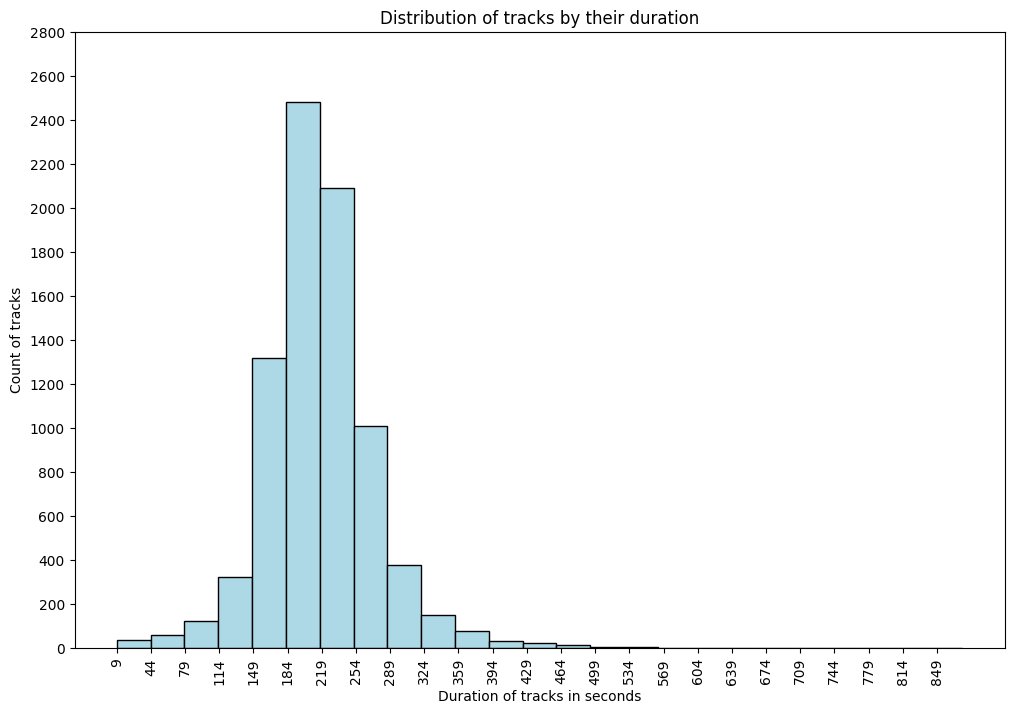

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(common_cleaned['duration_sec'], bins=25, color='lightblue', edgecolor='black')
plt.xlabel('Duration of tracks in seconds')
plt.ylabel('Count of tracks')
plt.title('Distribution of tracks by their duration')
maxi = common_cleaned['duration_sec'].max() + 1
mini = common_cleaned['duration_sec'].min()
plt.yticks(np.arange(0, 3000, 200))
plt.xticks(np.arange(mini, maxi, 35), rotation=90)
plt.show()

***Интерпретация результатов и вывод:***

Рынок музыкальных треков очень стандартизирован по длительности. Доминируют песни продолжительностью 3-4 минуты. Это знание можно использовать для планирования релизов: треки, сильно выбивающиеся из этого стандарта, могут хуже восприниматься алгоритмами плейлистов или слушателями, ожидающими привычного формата.

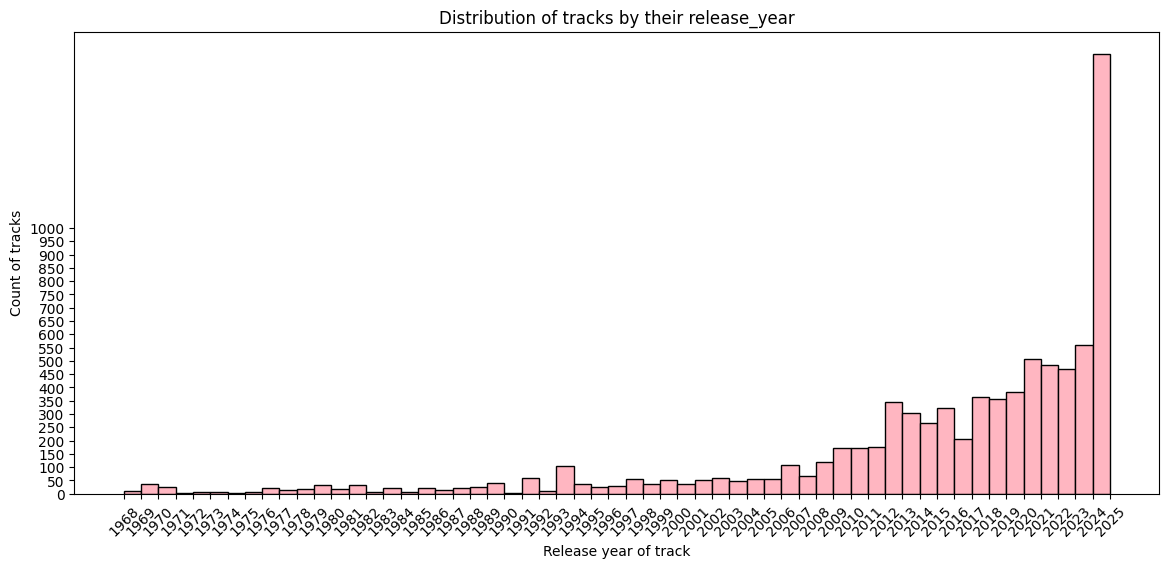

In [ ]:
min_year = common_cleaned['album_release_year'].min()
max_year = common_cleaned['album_release_year'].max()

bin_edges = np.arange(min_year, max_year + 1, 1)

plt.figure(figsize=(14, 6))
plt.hist(common_cleaned['album_release_year'], bins=bin_edges, color='lightpink', edgecolor='black')

plt.xlabel('Release year of track')
plt.ylabel('Count of tracks')
plt.title('Distribution of tracks by their release_year')

plt.yticks(np.arange(0, 1001, 50))

plt.xticks(bin_edges, rotation=45)

plt.show()

***Интерпретация результатов и вывод:***

Этот график показывает, сколько треков из датасета было выпущено в каждый конкретный год. График сильно скошен вправо. Это означает, что большинство треков в датасете — современные.

Важное следствие для анализа: Любые выводы, которые будут делаться на основе этого EDA, будут отражать в первую очередь реалии современной музыкальной индустрии, а не музыки в целом.

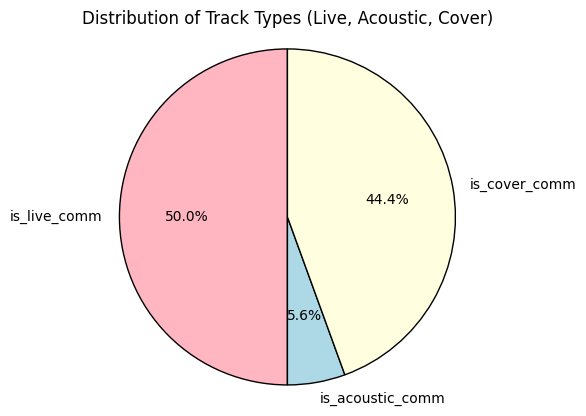

In [ ]:
counts = common_cleaned[['is_live_comm', 'is_acoustic_comm', 'is_cover_comm']].sum()

labels = counts.index

plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors = ['lightpink', 'lightblue', 'lightyellow'], wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Distribution of Track Types (Live, Acoustic, Cover)')
plt.axis('equal')
plt.show()

***Интерпретация результатов и вывод:***

Эта круговая диаграмма показывает, как "Live", "Acoustic" или "Cover" треки распределяются между собой.

Среди "нестандартных" типов треков (Live, Cover, Acoustic) в датасете доминируют концертные записи и каверы, которые встречаются примерно с одинаковой частотой. Чисто акустические аранжировки — значительно более редкое явление.

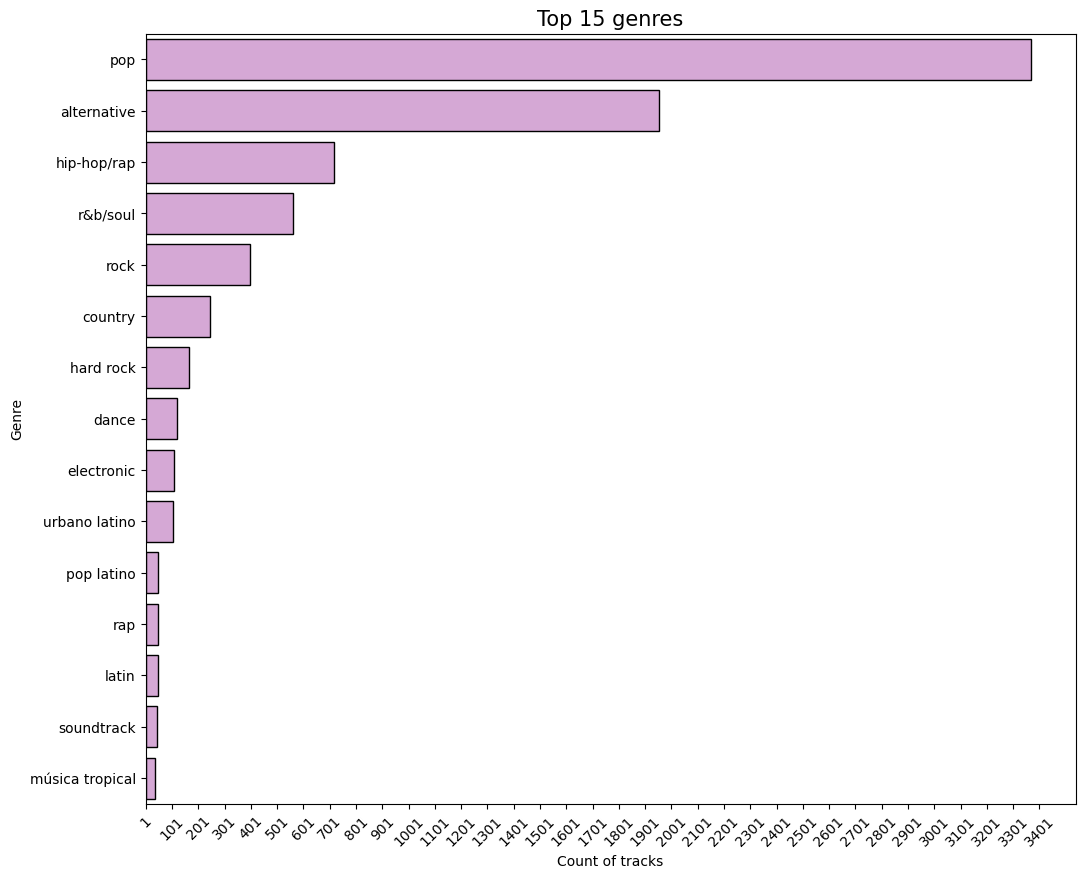

In [184]:
plt.figure(figsize=(12, 10))

top_15 = common_cleaned['track_genre'].value_counts().nlargest(15)
maxim = common_cleaned['track_genre'].value_counts().max() + 100
minim = common_cleaned['track_genre'].value_counts().min()

sns.barplot(x = top_15.values, y = top_15.index, color = 'plum', edgecolor = 'black')
plt.xticks(np.arange(minim, maxim, 100), rotation = 45)
plt.title('Top 15 genres', fontsize=15)
plt.xlabel('Count of tracks')
plt.ylabel('Genre')
plt.show()

/tmp/ipython-input-901647767.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=common_cleaned['title_word_count'], ax=axes[0], palette='PiYG', edgecolor='black')


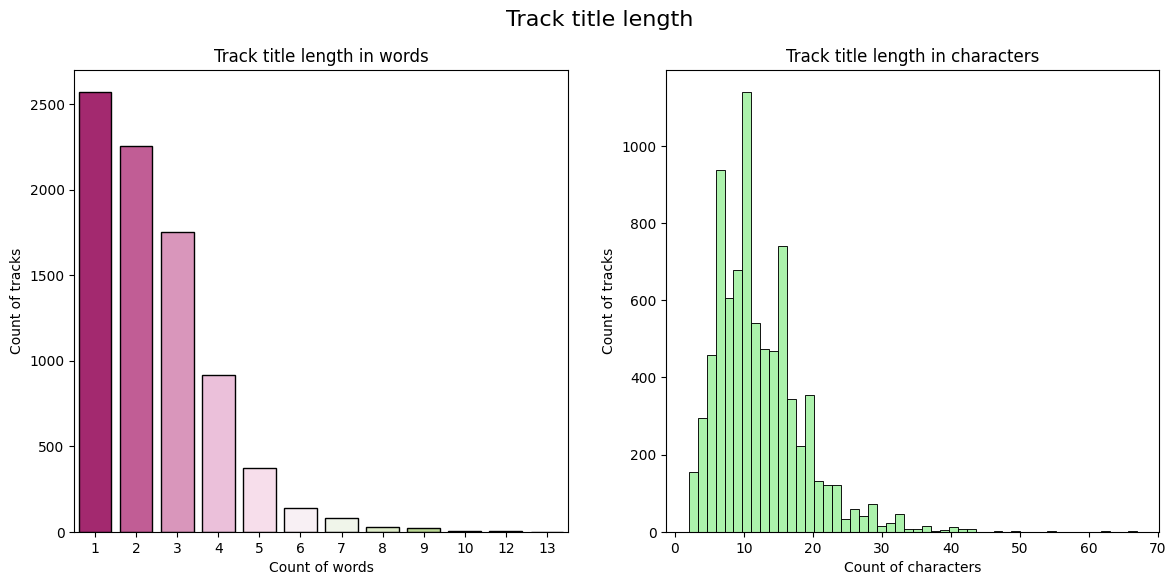

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Track title length', fontsize=16)

sns.countplot(x=common_cleaned['title_word_count'], ax=axes[0], palette='PiYG', edgecolor='black')
axes[0].set_title('Track title length in words')
axes[0].set_xlabel('Count of words')
axes[0].set_ylabel('Count of tracks')

sns.histplot(common_cleaned['title_length'], bins=50, ax=axes[1], color = 'lightgreen', edgecolor='black')
axes[1].set_title('Track title length in characters')
axes[1].set_xlabel('Count of characters')
axes[1].set_ylabel('Count of tracks')

plt.show()

документация по wordcloud: https://www.geeksforgeeks.org/python/generating-word-cloud-python/

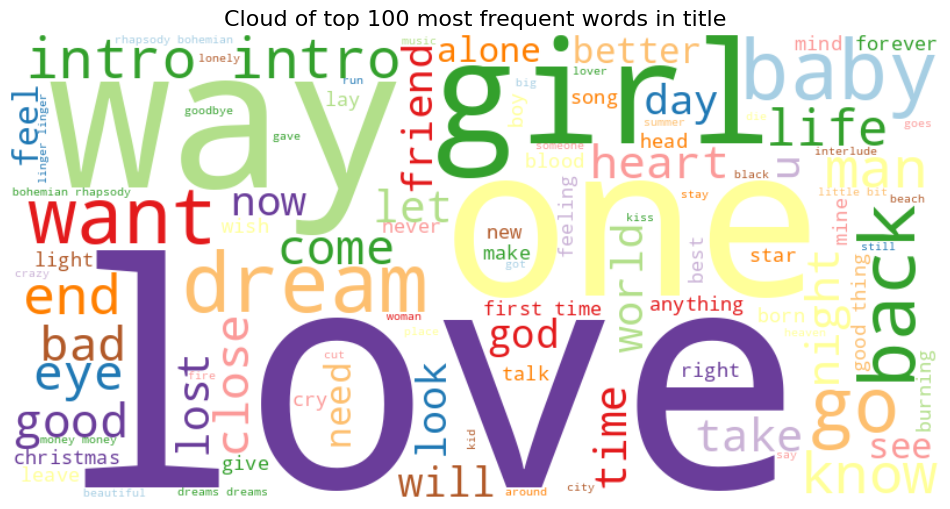

In [ ]:
from wordcloud import WordCloud, STOPWORDS
text = " ".join(str(title) for title in common_cleaned['track_title'].dropna())

more_stopwords = list(STOPWORDS) + ['feat', 'ft', 'remix', 'official', 'video', 'lyrics', 'lyric', 'album', 'version', 'edit', 'radio']

wordcloud = WordCloud(stopwords = more_stopwords, max_words = 100, background_color = 'white', width = 800, height = 400, colormap = 'Paired').generate(text)

plt.figure(figsize = (12, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Cloud of top 100 most frequent words in title', fontsize = 16)
plt.show()

/tmp/ipython-input-3239527181.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='index', data=top_words_df, palette='pastel', edgecolor='black')


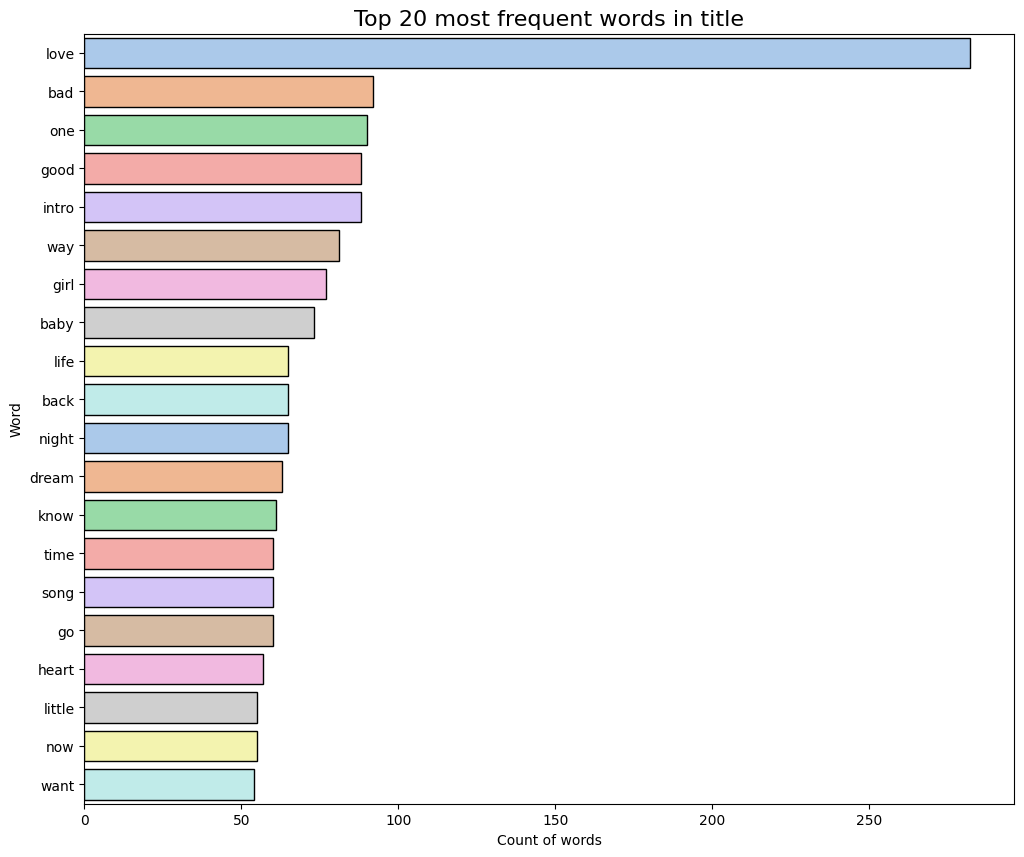

In [ ]:
import re

words = re.findall(r'\b\w+\b', text.lower())
filtered_words = [word for word in words if word not in more_stopwords]

words_series = pd.Series(filtered_words)
word_counts_series = words_series.value_counts().head(20)

top_words_df = word_counts_series.reset_index(name='Count')

plt.figure(figsize=(12, 10))
sns.barplot(x='Count', y='index', data=top_words_df, palette='pastel', edgecolor='black')
plt.title('Top 20 most frequent words in title', fontsize=16)
plt.xlabel('Count of words')
plt.ylabel('Word')
plt.show()

/tmp/ipython-input-3488827836.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=common_cleaned[common_cleaned['number_of_tracks'] <= 30]['number_of_tracks'], palette='rocket')


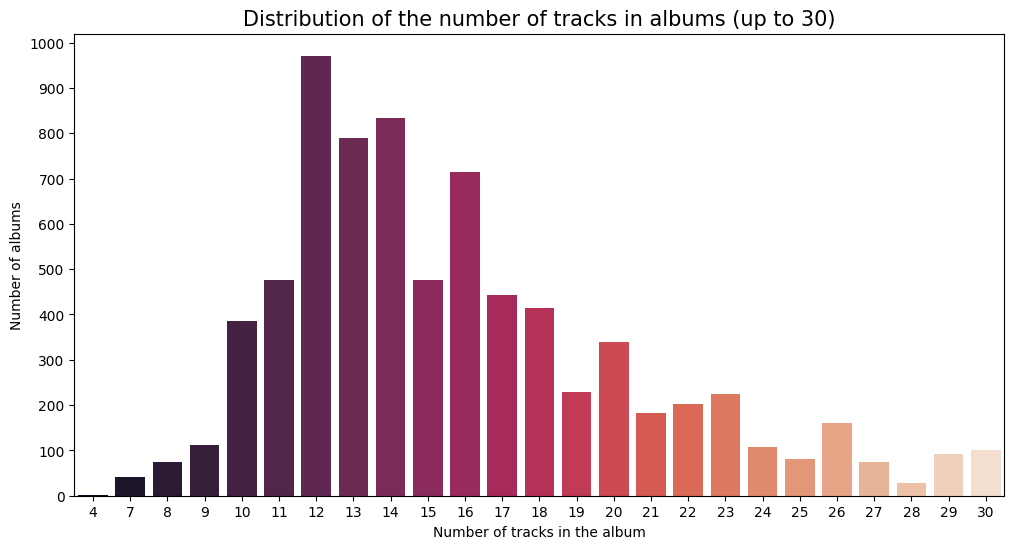

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x=common_cleaned[common_cleaned['number_of_tracks'] <= 30]['number_of_tracks'], palette='rocket')

plt.title('Distribution of the number of tracks in albums (up to 30)', fontsize=15)
plt.xlabel('Number of tracks in the album')
plt.ylabel('Number of albums')
plt.yticks(np.arange(0, 1001, 100))
plt.show()

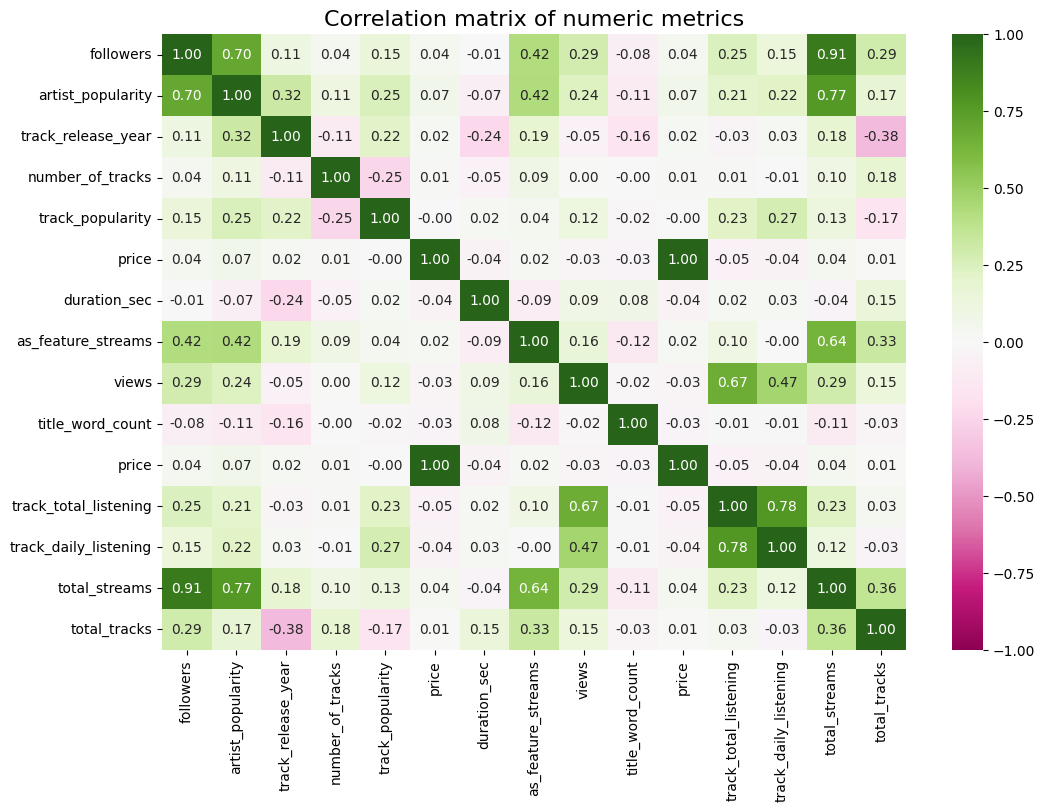

In [ ]:
numeric_cols = ['followers', 'artist_popularity', 'track_release_year', 'number_of_tracks', 'track_popularity', 'price', 'duration_sec', 'as_feature_streams', 'views', 'title_word_count', 'price', 'track_total_listening', 'track_daily_listening', 'total_streams', 'total_tracks']

corr_matrix = common_cleaned[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='PiYG', vmin=-1, vmax=1)
plt.title('Correlation matrix of numeric metrics', fontsize=16)
plt.show()

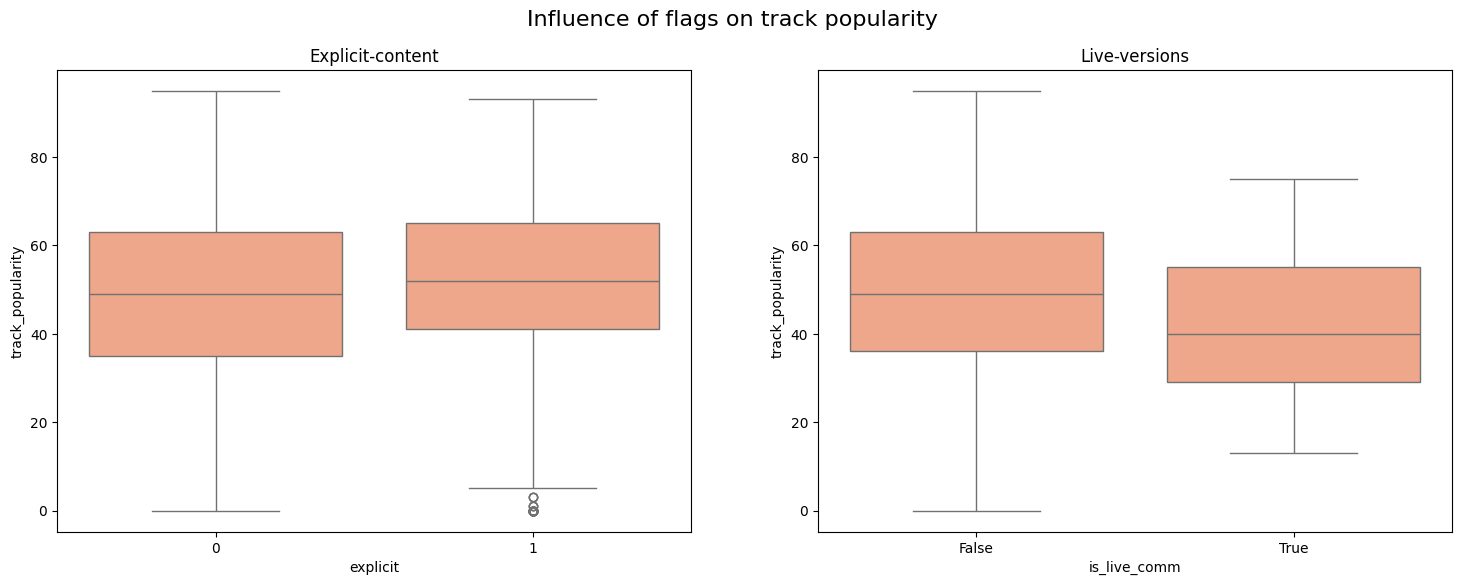

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Influence of flags on track popularity', fontsize=16)

sns.boxplot(ax=axes[0], data=common_cleaned, x='explicit', y='track_popularity', color='lightsalmon')
axes[0].set_title('Explicit-content')

sns.boxplot(ax=axes[1], data=common_cleaned, x='is_live_comm', y='track_popularity', color='lightsalmon')
axes[1].set_title('Live-versions')

plt.show()

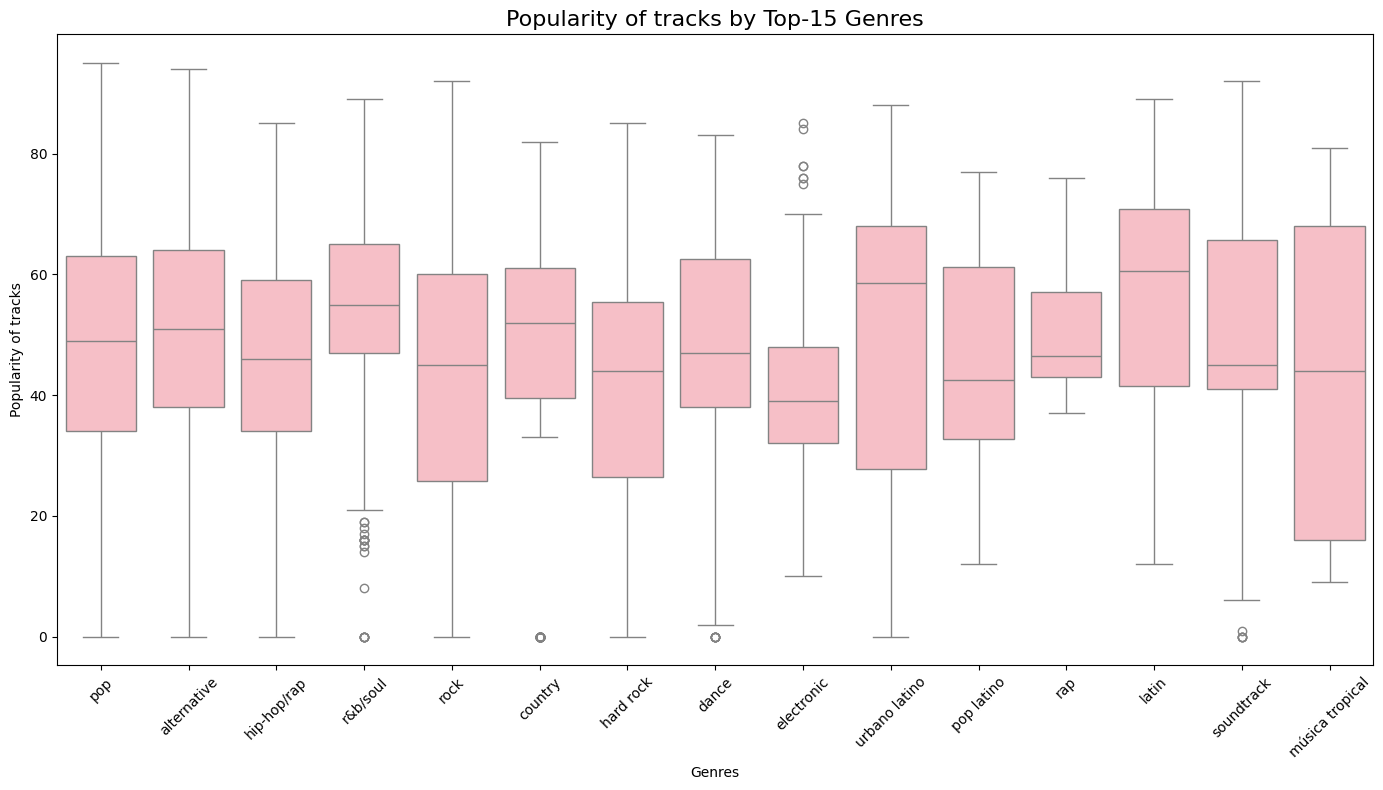

In [ ]:
top_15_genres = common_cleaned['track_genre'].value_counts().nlargest(15).index

df_top_genres = common_cleaned[common_cleaned['track_genre'].isin(top_15_genres)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top_genres, x='track_genre', y='track_popularity', order=top_15_genres,  color = 'lightpink')

plt.title('Popularity of tracks by Top-15 Genres', fontsize=16)
plt.xlabel('Genres')
plt.ylabel('Popularity of tracks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

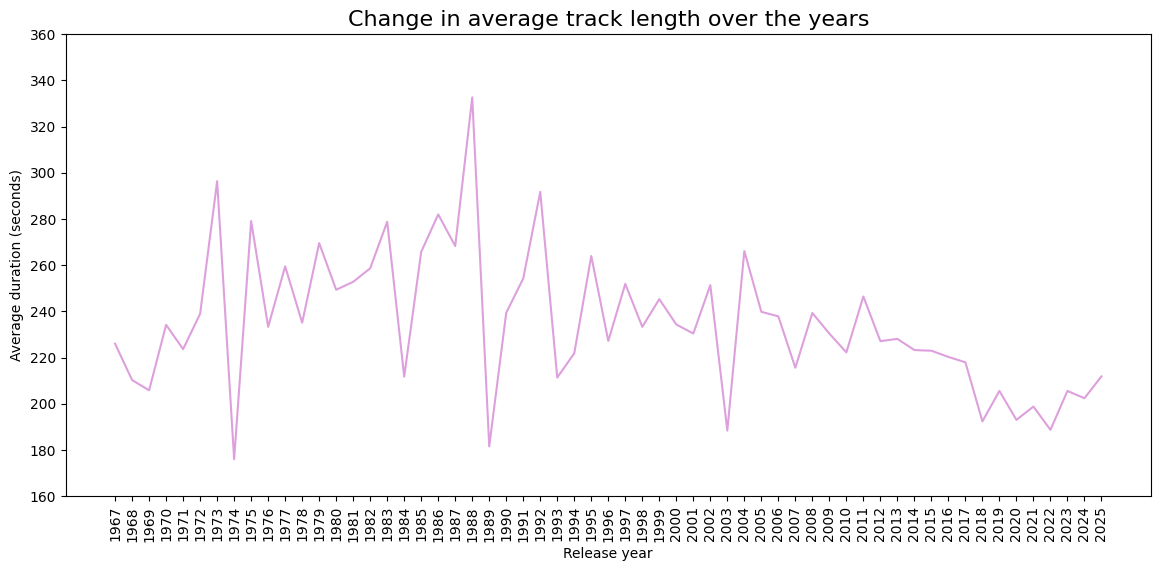

In [ ]:
year_duration = common_cleaned.groupby('track_release_year')['duration_sec'].mean()

plt.figure(figsize=(14, 6))
sns.lineplot(data=year_duration[year_duration.index], color='plum')

plt.title('Change in average track length over the years', fontsize=16)
plt.xlabel('Release year')
plt.ylabel('Average duration (seconds)')
plt.xticks(ticks=year_duration.index, rotation=90)
plt.yticks(np.arange(160, 380, 20))
plt.show()

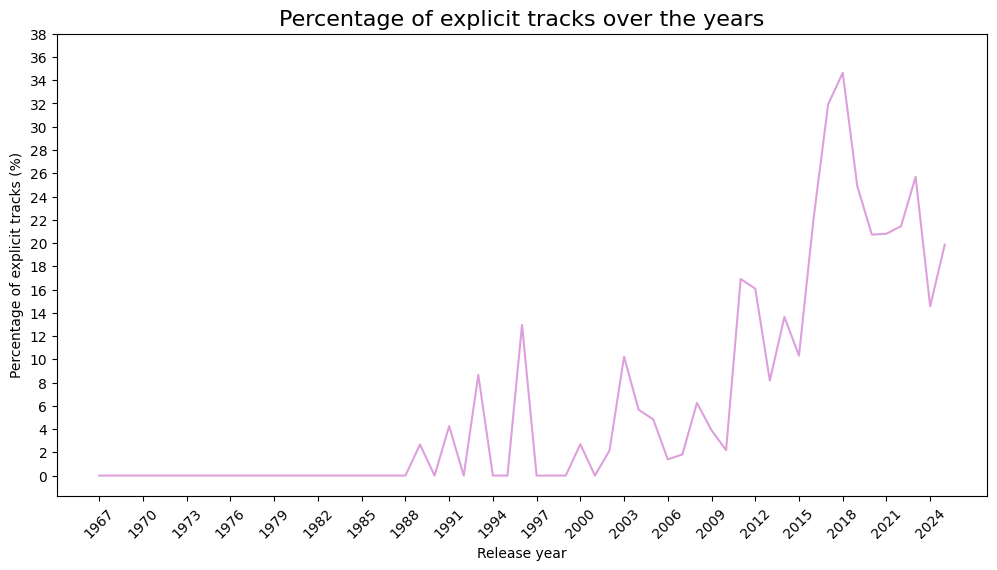

In [ ]:
yearly_explicit = common_cleaned.groupby('track_release_year')['explicit'].mean() * 100

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_explicit[yearly_explicit.index], color='plum')
plt.xticks(ticks=year_duration.index[::3], rotation=45)
plt.yticks(np.arange(0, 40, 2))
plt.title('Percentage of explicit tracks over the years', fontsize=16)
plt.xlabel('Release year')
plt.ylabel('Percentage of explicit tracks (%)')
plt.show()

##Новые Признаки (Feature Engineering)

is_hit_song: популярный трек или нет (bool)

In [ ]:
hit = 75
common_cleaned['is_hit_song'] = common_cleaned['track_popularity'] > hit

print("Проверка новой колонки:")
print(common_cleaned[['track_popularity', 'is_hit_song']].head())

print("\nРаспределение 'хитов' (True) и 'не-хитов' (False):")
print(common_cleaned['is_hit_song'].value_counts())

Проверка новой колонки:
   track_popularity  is_hit_song
0                67        False
1                67        False
2                88         True
3                88         True
4                66        False

Распределение 'хитов' (True) и 'не-хитов' (False):
is_hit_song
False    7408
True      737
Name: count, dtype: int64


artist_avg_popularity: средняя  популярность трека по всем песням артиста (float64)

In [ ]:
common_cleaned['artist_avg_popularity'] = common_cleaned.groupby('artist')['track_popularity' ].transform('mean')

print("Проверка новой колонки:")
print(common_cleaned[['artist', 'artist_avg_popularity']].drop_duplicates(subset=['artist']).sample(10))

Проверка новой колонки:
                 artist  artist_avg_popularity
5380  justin timberlake              44.250000
351          tate mcrae              40.738095
3426         juice wrld              60.071429
3314        demi lovato              33.183673
150       calvin harris              21.833333
2914              gunna              54.142857
2059           flo rida              52.357143
5060        chris brown              50.666667
1257       harry styles              67.371429
6428            j. cole              50.769231


track_relative_popularity:  популярность трека / средняя популярность трека по всем песням артиста (float64)

In [ ]:
common_cleaned['track_relative_popularity'] = common_cleaned['track_popularity'] / common_cleaned['artist_avg_popularity']

common_cleaned['track_relative_popularity'] = common_cleaned['track_relative_popularity'].fillna(1.0)
common_cleaned['track_relative_popularity'] = common_cleaned['track_relative_popularity'].replace([np.inf, -np.inf], 1.0)

print("Проверка новой колонки:")
print("Значение > 1.0: трек популярнее, чем в среднем у артиста")
print("Значение < 1.0: трек менее популярен, чем в среднем у артиста")

print(common_cleaned[['artist', 'track_title', 'track_relative_popularity']].sort_values(by='artist').head(10))

Проверка новой колонки:
Значение > 1.0: трек популярнее, чем в среднем у артиста
Значение < 1.0: трек менее популярен, чем в среднем у артиста
         artist        track_title  track_relative_popularity
1886  21 savage               asmr                   0.826703
1896  21 savage  out for the night                   1.008174
1893  21 savage              a lot                   1.572752
1875  21 savage     american dream                   0.967847
1876  21 savage          all of me                   1.350954
1877  21 savage             redrum                   1.572752
1878  21 savage    3am on glenwood                   1.129155
1879  21 savage              a lot                   1.048501
1880  21 savage       break da law                   0.846866
1881  21 savage                a&t                   0.766213


release_season: время года когда вышел трек (object)

In [ ]:
season_map = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}
common_cleaned['release_season'] = common_cleaned['track_release_month'].map(season_map)

print("\nРаспределение треков по сезонам:")
print(common_cleaned['release_season'].value_counts())


Распределение треков по сезонам:
release_season
Autumn    2622
Spring    2192
Summer    2002
Winter    1329
Name: count, dtype: int64


track_age: возраст трека (int32)

In [ ]:
current_year = 2025

common_cleaned['track_age'] = current_year - common_cleaned['track_release_year']

print("Проверка новой колонки:")
print(common_cleaned[['track_release_year', 'track_age']].sample(10))

print("\nРаспределение возраста треков:")
print(common_cleaned['track_age'].describe())

Проверка новой колонки:
      track_release_year  track_age
7045                2011         14
2241                2013         12
1913                2023          2
7583                2012         13
5800                2005         20
2749                1982         43
7067                2011         14
674                 2007         18
5773                2005         20
3837                2002         23

Распределение возраста треков:
count    8145.000000
mean       12.294782
std        12.321153
min         0.000000
25%         4.000000
50%         8.000000
75%        15.000000
max        58.000000
Name: track_age, dtype: float64


## Гипотезы

###Гипотеза 1: Треки с "feat" (приглашенными артистами) в среднем более популярны

In [ ]:
feat_popularity = common_cleaned.groupby('has_feat_in_title')['track_popularity'].mean()

popular_with_feat = feat_popularity[1]
popular_without_feat = feat_popularity[0]

print(f"Популярность треков с 'feat' ({popular_with_feat:.2f})")
print(f"Популярность треков без 'feat' ({popular_without_feat:.2f})")

if popular_with_feat > popular_without_feat:
    print(f"\nВывод: Гипотеза подтверждается.")
else:
    print(f"\nВывод: Гипотеза НЕ подтверждается.")

Популярность треков с 'feat' (50.67)
Популярность треков без 'feat' (47.89)

Вывод: Гипотеза подтверждается.


/tmp/ipython-input-2554006825.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='has_feat_in_title', y='track_popularity', data=common_cleaned, palette=['skyblue', 'salmon'])


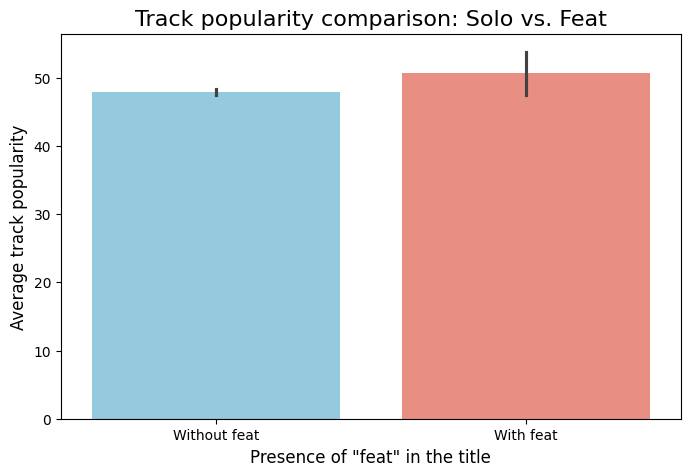

In [ ]:
plt.figure(figsize=(8, 5))

sns.barplot(x='has_feat_in_title', y='track_popularity', data=common_cleaned, palette=['skyblue', 'salmon'])

plt.title('Track popularity comparison: Solo vs. Feat', fontsize=16)
plt.xlabel('Presence of "feat" in the title', fontsize=12)
plt.ylabel('Average track popularity', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Without feat', 'With feat'])
plt.show()

***Интерпретация результатов и вывод:***


*   Средняя популярность треков БЕЗ 'feat.' (Solo): 47.89
*   Средняя популярность треков С 'feat' (Feat): 50.67

Гипотеза полностью подтверждается. Треки, в названии которых явно указан приглашенный артист ("feat"), в среднем действительно более популярны. Разница составляет 2.78 пункта популярности.

***Рекомендации для бизнеса:***

Эти цифры подтверждают то, что коллаборации работают. Вот почему:

Эффект кросс-промоушена (Перекрестное опыление): Это самый главный инсайт. Когда артист A выпускает трек с артистом B, этот трек сразу же предлагается фан-базам обоих артистов. Это автоматически удваивает (или даже больше, если артистов несколько) первоначальный охват аудитории.

Стриминговые сервисы видят, что трек релевантен для слушателей и артиста A, и артиста B. Алгоритм с большей вероятностью будет рекомендовать такой трек, включать его в персонализированные плейлисты ("Discover Weekly", "Release Radar") для обеих аудиторий, что резко повышает его "открываемость" (discoverability).

Повышение "открываемости" для артистов: Для менее известного артиста "фит" с более популярным — это самый быстрый способ получить доступ к новой, большой аудитории. Для крупного артиста "фит" с модным новичком — способ показать, что он "в теме" и привлечь более молодую аудиторию.

На основе этих данных можно сформулировать конкретные рекомендации для разных игроков музыкального рынка.

Для лейблов и A&R-менеджеров (Поиск и развитие артистов) рекомендации следующие:
Активно поощрять коллаборации: Сделать "фиты" частью стратегии продвижения для артистов. Активно искать и организовывть совместные треки.

При подписании нового артиста можно сразу планировать ему "фит" с более известным артистом лейбла для "быстрого старта" и знакомства с аудиторией.

Не нужно скрывать коллаборацию: анализ доказывает, что has_feat_in_title — это некий ключик. Лучше указывать "feat. [Имя Артиста]" прямо в названии трека и не прятать эту информацию в описание. Это важно и для алгоритмов, и для пользователей.

При этом также можно уточнить, что разброс средней популярности трека у фитов более большой, то есть соло треки имеют немного стабильнее уровень средней популярности. Это говорит о том, что всё-таки создание фита может иметь небольшой риск получить как раз таки популярность ниже.

Это может быть связано с различием аудиторий и не принятием аудитории одного артиста стиля другого артиста. То есть нужно уточнять, что исполнители имеют некие точки соприкосновения в своем творчестве.

###Гипотеза 2: Короткие названия треков более вирусные и популярные.

In [ ]:
cor = common_cleaned['title_length'].corr(common_cleaned['track_popularity'])

print(f"Коэффициент корреляции между длиной названия и популярностью:")
print(f"r = {cor:.4f}")

if cor < -0.1:
    print(f"\nВывод: Гипотеза подтверждается")
    print("Обнаружена обратная корреляция: чем длиннее название, тем ниже популярность.")
elif cor > 0.1:
    print(f"\nВывод: Гипотеза НЕ подтверждается.")
    print("Обнаружена прямая корреляция: чем длиннее название, тем выше популярность.")
else:
    print(f"\nВывод: Гипотеза НЕ подтверждается.")
    print("Значимой линейной корреляции между длиной названия и популярностью нет.")

Коэффициент корреляции между длиной названия и популярностью:
r = -0.0043

Вывод: Гипотеза НЕ подтверждается.
Значимой линейной корреляции между длиной названия и популярностью нет.


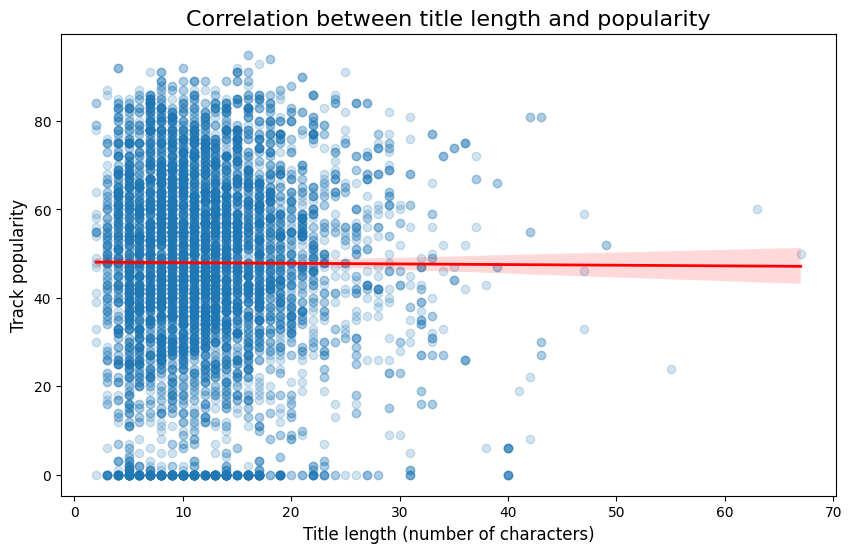

In [ ]:
plt.figure(figsize=(10, 6))

sns.regplot(x='title_length', y='track_popularity',data=common_cleaned, scatter_kws={'alpha': 0.2}, line_kws={'color': 'red', 'lw': 2})

plt.title('Correlation between title length and popularity', fontsize=16)
plt.xlabel('Title length (number of characters)', fontsize=12)
plt.ylabel('Track popularity', fontsize=12)
plt.show()

***Интерпретация результатов и вывод:***

Расчет корреляции: Вычислив коэффициент корреляции Пирсона между title_length (длина названия) и track_popularity (популярность трека), мы получили значение r = -0.0043.

(график рассеяния (regplot) наглядно это подтверждает)

Точки (треки) расположены плотным, хаотичным облаком. Нет никакой видимой тенденции или структуры.

Красная линия тренда (линия регрессии) почти идеально горизонтальна.

Вывод:

Гипотеза НЕ подтверждается.

Значение r = -0.0043 ничтожно близко к нулю. Это означает, что линейная связь между длиной названия трека и его популярностью полностью отсутствует.

Проще говоря:

Короткое название не делает трек популярнее.

Длинное название не делает трек менее популярным.

Популярные (и непопулярные) треки встречаются с абсолютно любой длиной названия.

***Рекомендации для бизнеса:***

Бизнес-инсайты
Это "нулевой результат", который не менее важен, чем подтвержденная гипотеза, поскольку он развенчивает распространенный миф.

Миф развенчан: Инсайт в том, что распространенное мнение "название должно быть коротким, хлестким и вирусным" не находит подтверждения в данных. По крайней мере, в контексте стриминговых платформ.

Творческая свобода — это хорошо: Это отличная новость для артистов и лейблов. Им не нужно искусственно ограничивать себя и выдумывать короткие названия, опасаясь "отпугнуть" слушателя или алгоритмы. Можно использовать длинные, описательные или концептуальные названия (как, например, у "Panic! At The Disco" или "The 1975"), и это никак не повредит успеху трека.

Контент важнее "упаковки": В сочетании с нашим предыдущим выводом (про "feat.") складывается четкая картина: слушателей и алгоритмы волнует кто участвует в треке, а не сколько символов в его названии.

На основе этих данных можно дать четкие рекомендации.

Для артистов:
Перестать беспокоиться о длине названия. Фокусироваться на том, чтобы название было подходящим, запоминающимся и отражало суть песни или ее главный "хук".

Не ограничивать креативность. Если длинное название является частью художественного замысла — смело использовать его. Данные показывают, что это безопасно.

###Гипотеза 3: Треки, выпущенные осенью, имеют в среднем более высокую популярность из-за попадания в плейлисты к "главному" сезону наград и предпраздничным распродажам

In [ ]:
season_popularity = common_cleaned.groupby('release_season')['track_popularity'].mean().sort_values()
print(season_popularity)

print(f"\nСамый популярный сезон - '{season_popularity.index[-1]}' (ср. популярность: {season_popularity.iloc[-1]:.2f}).")

if season_popularity.index[-1] == 'Autumn':
    print(f"Вывод: Гипотеза подтверждается.")
else:
    print(f"Вывод: Гипотеза НЕ подтверждается.")


release_season
Winter    46.732882
Autumn    47.199085
Spring    48.103102
Summer    49.524476
Name: track_popularity, dtype: float64

Самый популярный сезон - 'Summer' (ср. популярность: 49.52).
Вывод: Гипотеза НЕ подтверждается.


/tmp/ipython-input-512885464.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='release_season', y='track_popularity', data=common_cleaned, order=['Winter', 'Spring', 'Summer', 'Autumn'], palette='pastel')


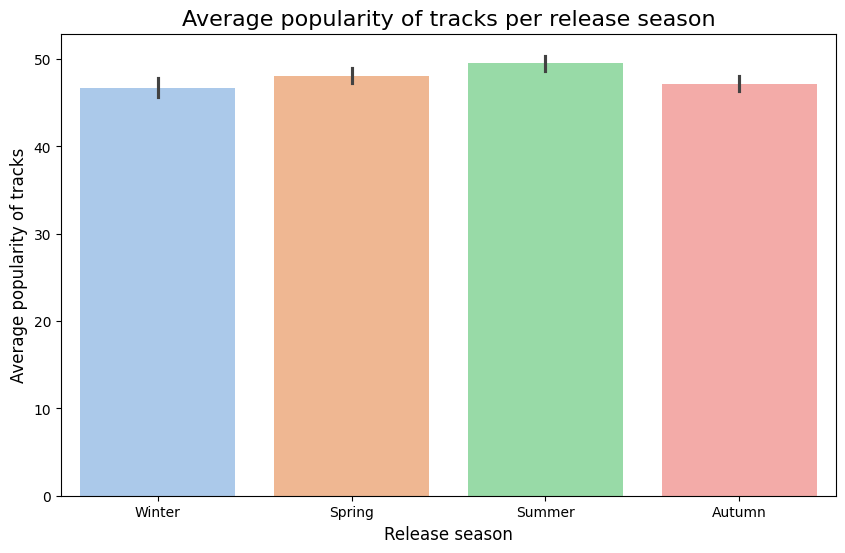

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x='release_season', y='track_popularity', data=common_cleaned, order=['Winter', 'Spring', 'Summer', 'Autumn'], palette='pastel')

plt.title('Average popularity of tracks per release season', fontsize=16)
plt.xlabel('Release season', fontsize=12)
plt.ylabel('Average popularity of tracks', fontsize=12)
plt.show()

/tmp/ipython-input-402972210.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='release_season', y='track_popularity', data=common_cleaned, order=['Winter', 'Spring', 'Summer', 'Autumn'], palette='pastel')


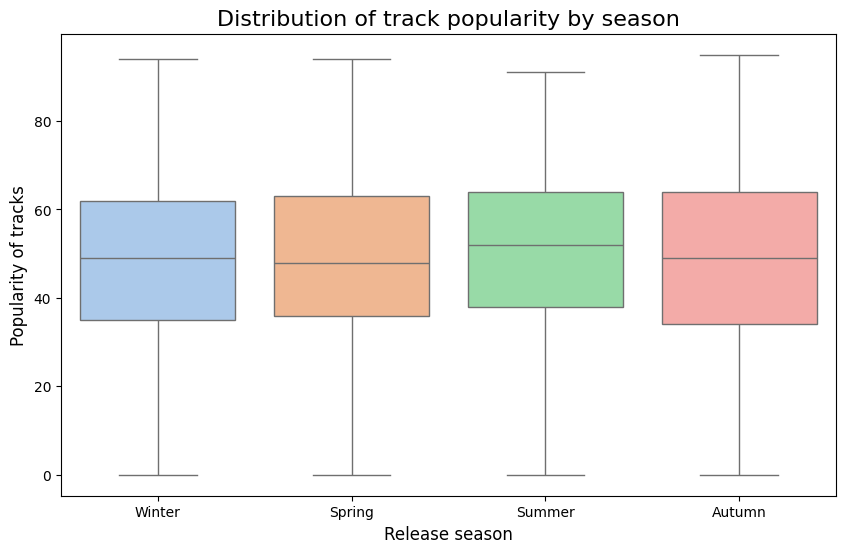

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='release_season', y='track_popularity', data=common_cleaned, order=['Winter', 'Spring', 'Summer', 'Autumn'], palette='pastel')

plt.title('Distribution of track popularity by season', fontsize=16)
plt.xlabel('Release season', fontsize=12)
plt.ylabel('Popularity of tracks', fontsize=12)
plt.show()

***Интерпретация результатов и вывод:***

Гипотеза не подтвердилась, сезон не сильно влияет на популярность треков. В качестве подтверждения был построен ящик с усами. Для лета заметно смещена вверх по сравнению с другими сезонами. Это значит, что не только среднее выше, но и в целом дистрибуция популярности летних треков выше.

Выводы
1. "Летний хит" не просто маркетинговый ход, а статистическая реальность. Музыка, выпущенная летом, в среднем популярнее.
2. Зима — "низкий сезон": Зима показывает самую низкую среднюю популярность. Это логично: посленовогодний спад, меньше социальных активностей, "спячка"
3. Весна как "разгон": Весна показывает вторые по силе результаты. Это сезон "разгона" перед летом, когда настроение людей улучшается, и они начинают искать саундтрек для грядущих теплых дней.


***Рекомендации для бизнеса:***

Весна: Выпуск "разогревочного" сингла.
Лето: Выпуск главного хита или альбома.
Осень: Выпуск второго сингла (например, баллады) для поддержания интереса.
Зима: Запись нового материала, небольшой релиз (например, акустический EP) для самой лояльной аудитории.

###Гипотеза 4: цена трека неэластична, т.е. она никак не коррелирует ни с популярностью трека, ни с просмотрами статьи о нем, ни с годом релиза.

In [ ]:
need_columns = ['price', 'track_popularity', 'views', 'track_release_year']
need_df = common_cleaned[need_columns]

corr_matrix = need_df.corr()

print("\nМатрица корреляции Пирсона цены:")
print(corr_matrix['price'].drop('price'))


Матрица корреляции Пирсона цены:
track_popularity     -0.002497
views                -0.028976
track_release_year    0.017302
Name: price, dtype: float64


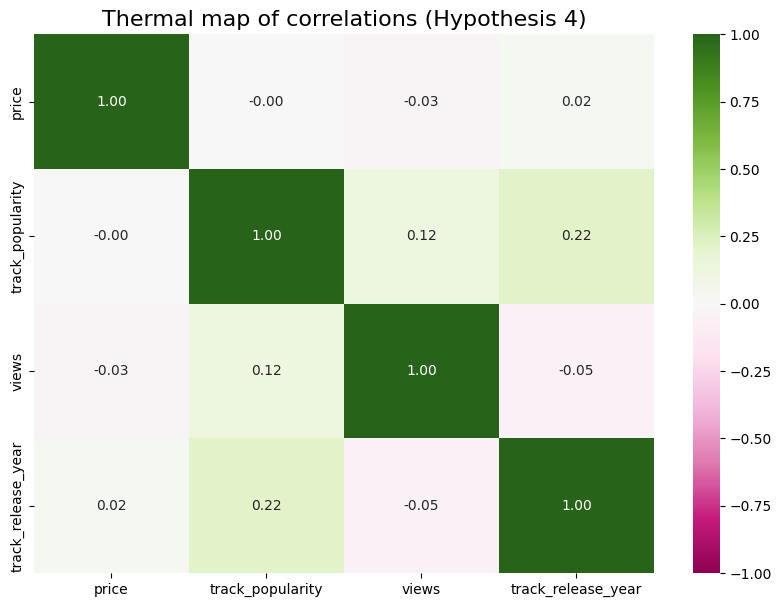

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='PiYG', fmt='.2f', vmin=-1, vmax=1)
plt.title('Thermal map of correlations (Hypothesis 4)', fontsize=16)
plt.show()

***Интерпретация результатов и вывод:***

Гипотеза полностью подтверждается.

Все три коэффициента корреляции практически равны нулю. Это означает, что никакой линейной связи между ценой трека и другими показателями нет.

Ценообразование — стандартизировано, а не динамично. Поскольку все цены одинаковы, слушатель не принимает решение о прослушивании или покупке на основе цены. Ему не нужно искать, где подешевле.

Популярность — это не про цену: Успех трека определяется другими факторами, но не ценой. Трек не становится хитом, потому что он дешевый, и на него не повышают цену, когда он становится хитом.

***Рекомендации для бизнеса:***

*Для лейблов и маркетологов*

Вместо ценовых стратегий, все ресурсы должны быть направлены на факторы, которые действительно влияют на популярность:

*   Организация коллабораций
*   Выбор правильного жанра
*   Питчинг треков в плейлисты

*Для бизнес-стратегов и платформ*

Модель "единой цены" доказала свою эффективность: Она упрощает для пользователя процесс покупки и смещает фокус с "цены" на "открытие" музыки, что и является целью стриминговых сервисов.

Переход к стримингу логичен: Этот анализ показывает, почему мир перешел от продаж "за трек" (iTunes) к модели "за подписку" (Spotify, Apple Music). Если цена за трек все равно неэластична и стандартна, то логичнее просто убрать этот барьер и предложить "все по одной цене" (ежемесячная подписка).

###Гипотеза 5:  В рамках одного альбома существует отрицательная корреляция между номером трека и ежедневными прослушиваниями, то есть люди чаще бросают слушать альбом, не доходя до конца

In [180]:
def calculate_correlation(group):
    return group['track_number_in_album'].corr(group['track_daily_listening'])

grouped_albums = common_cleaned.groupby(['artist', 'album_title'])
album_correlations = grouped_albums.apply(calculate_correlation)
album_correlations_cleaned = album_correlations.dropna()

mean_corr = album_correlations_cleaned.mean()
median_corr = album_correlations_cleaned.median()

print(f"Средняя корреляция: {mean_corr:.4f}")
print(f"Медианная корреляция: {median_corr:.4f}")

if median_corr < -0:
    print("\nВывод: Гипотеза подтверждается.")
else:
    print("\nВывод: Гипотеза НЕ подтверждается.")

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Средняя корреляция: -0.1910
Медианная корреляция: -0.3346

Вывод: Гипотеза подтверждается.


/tmp/ipython-input-1418204712.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  album_correlations = grouped_albums.apply(calculate_correlation)


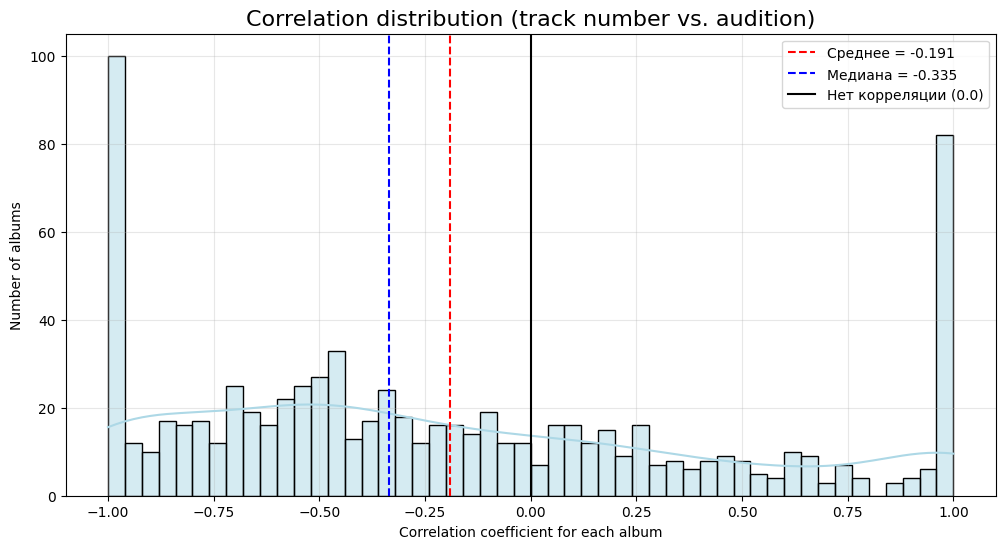

In [183]:
plt.figure(figsize=(12, 6))
sns.histplot(album_correlations_cleaned, bins=50, kde=True, color='lightblue')
plt.axvline(mean_corr, color='red', linestyle='--', label=f'Среднее = {mean_corr:.3f}')
plt.axvline(median_corr, color='blue', linestyle='--', label=f'Медиана = {median_corr:.3f}')
plt.axvline(0, color='black', linestyle='-', label='Нет корреляции (0.0)')
plt.title('Correlation distribution (track number vs. audition)', fontsize=16)
plt.xlabel('Correlation coefficient for each album')
plt.ylabel('Number of albums')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

***Интерпретация результатов и вывод:***

Гипотеза подтверждается. По данным нашего анализа, люди чаще бросают слушать альбом не дозодя до конца, что подтверждается отрицательной корелляцией между номером трека и ежедневным прослушиванием.

Медианная корреляция: -0.3346
Средняя корреляция: -0.1910

Среднее (-0.191) ближе к нулю, чем медиана (-0.335). Это связано с тем, что на гистограмме есть заметный "хвост" в положительной зоне и большой пик на +1.0 (альбомы, где последние треки популярнее первых). Эти выбросы "тянут" среднее значение вправо. Поэтому в данном случае медиана — более надежный показатель, и он говорит о сильном негативном тренде.

Распределение: Вся "масса" гистограммы, не считая странных пиков по краям, явно смещена влево от нуля. Это означает, что отрицательная корреляция — это доминирующая тенденция в индустрии.

***Рекомендации для бизнеса:***

1. Первые 1-2 трека должны быть самыми сильными, чтобы "зацепить" слушателя и побороться с его желанием переключить.
2. После сильного начала нельзя ставить 3-4 "проходных" трека подряд. Слушатель уйдет. Альбом должен быть динамичным.
3. Чем длиннее альбом, тем сильнее будет эффект "отвала". Оптимальная длина — 8-12 треков, где каждый на своем месте.
4. Вместо того чтобы продвигать альбом целиком, продвигайте 3-4 ключевых трека из него в разные плейлисты.
5. Если по стратегии артиста важный трек стоит в конце, он требует отдельного маркетингового бюджета. Он не "взлетит" сам по себе за счет прослушивания альбома.